In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
import folium
import geopandas as gpd
from geopy.geocoders import Nominatim
from sklearn.cluster import DBSCAN, KMeans, MiniBatchKMeans, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
import collections.abc
from collections.abc import MutableSequence 

import xgboost
import shap
shap.initjs()

C:\Users\aradh\anaconda3\envs\vizml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("Cleaned data/Cleaned_Data.csv", index_col=0, parse_dates=['CRASH DATE'])
data['YEAR'] = data['CRASH DATE'].dt.year
data['MONTH'] = data['CRASH DATE'].dt.month
data['DATE'] = data['CRASH DATE'].dt.day
# data = data[data['YEAR']]
data['HOUR'] = data['CRASH TIME'].apply(lambda i:int(i.split(':')[0]))

In [3]:
encoders = {}
data_clustering = data.drop(columns = ['CRASH DATE', 'CRASH TIME', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'COLLISION_ID'])
for col in data_clustering.columns:
    if data_clustering[col].dtype == 'O':
        col_encoder = LabelEncoder()
        data_clustering[col] = col_encoder.fit_transform(data_clustering[col])
        encoders[col] = [col_encoder]
    else:
        encoders[col] = []
    scaler = StandardScaler()
    data_clustering[col] = scaler.fit_transform(np.array(data_clustering[col]).reshape(-1, 1))
    encoders[col].append(scaler)

In [4]:
encoders_2 = {}
data_encoded = data.drop(columns = ['CRASH DATE', 'CRASH TIME', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'COLLISION_ID'])
for col in data_encoded:
    if data_encoded[col].dtype == 'O':
        col_encoder = LabelEncoder()
        data_encoded[col] = col_encoder.fit_transform(data_encoded[col])
        encoders_2[col] = col_encoder

In [51]:
data['VEHICLE TYPE CODE 2'].unique()

array(['Sedan', nan, 'Tractor Truck Diesel', ..., 'dsny sweep',
       'Yellow Bus', 'MARSH ,OPE'], dtype=object)

In [5]:
data_clustering.dtypes

BOROUGH                          float64
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED    float64
NUMBER OF PEDESTRIANS KILLED     float64
NUMBER OF CYCLIST INJURED        float64
NUMBER OF CYCLIST KILLED         float64
NUMBER OF MOTORIST INJURED       float64
NUMBER OF MOTORIST KILLED        float64
CONTRIBUTING FACTOR VEHICLE 1    float64
CONTRIBUTING FACTOR VEHICLE 2    float64
CONTRIBUTING FACTOR VEHICLE 3    float64
CONTRIBUTING FACTOR VEHICLE 4    float64
CONTRIBUTING FACTOR VEHICLE 5    float64
VEHICLE TYPE CODE 1              float64
VEHICLE TYPE CODE 2              float64
VEHICLE TYPE CODE 3              float64
VEHICLE TYPE CODE 4              float64
VEHICLE TYPE CODE 5              float64
YEAR                             float64
MONTH                            float64
DATE            

In [6]:
data_clustering[['LONGITUDE', 'LATITUDE']].describe()

LONGITUDE      LATITUDE
count  1.971716e+06  1.971716e+06
mean   3.812215e-13  1.560383e-13
std    1.000000e+00  1.000000e+00
min   -3.842583e+00 -2.839882e+00
25%   -6.298888e-01 -7.033462e-01
50%   -7.374550e-02 -3.822112e-02
75%    6.222939e-01  5.772790e-01
max    3.000958e+00  2.841148e+00

In [7]:
data_clustering.loc[data_clustering['ZIP CODE'].isna(),'ZIP CODE'] = -1
data_encoded.loc[data_encoded['ZIP CODE'].isna(), 'ZIP CODE'] = -1
data_clustering.isna().sum().sum()

0

In [8]:
scores = {}
print("Begin")

for yr in data_clustering['YEAR'].unique():
    print(yr)
    data_yr = data_clustering[data_clustering['YEAR']==yr]
    scores[yr] = []
    for k in range(1, 10):
        print(k, " clusters", end = "; ")
        scores[yr].append([])
        for seed in range(3):
            print(seed)
            kmeans = MiniBatchKMeans(
                n_clusters=k,
                max_iter=25,
                n_init=1,
                random_state=seed,
                batch_size=10240
            )
            kmeans.fit(data_yr)
            y_kmeans = kmeans.predict(data_yr)
            # Plot
            scores[yr][k-1].append(kmeans.inertia_)

Begin
1.2731497933012796
1  clusters; 0
1
2
2  clusters; 0
1
2
3  clusters; 0
1
2
4  clusters; 0
1
2
5  clusters; 0
1
2
6  clusters; 0
1
2
7  clusters; 0
1
2
8  clusters; 0
1
2
9  clusters; 0
1
2
1.5975433659649132
1  clusters; 0
1
2
2  clusters; 0
1
2
3  clusters; 0
1
2
4  clusters; 0
1
2
5  clusters; 0
1
2
6  clusters; 0
1
2
7  clusters; 0
1
2
8  clusters; 0
1
2
9  clusters; 0
1
2
0.6243626479740122
1  clusters; 0
1
2
2  clusters; 0
1
2
3  clusters; 0
1
2
4  clusters; 0
1
2
5  clusters; 0
1
2
6  clusters; 0
1
2
7  clusters; 0
1
2
8  clusters; 0
1
2
9  clusters; 0
1
2
0.9487562206376459
1  clusters; 0
1
2
2  clusters; 0
1
2
3  clusters; 0
1
2
4  clusters; 0
1
2
5  clusters; 0
1
2
6  clusters; 0
1
2
7  clusters; 0
1
2
8  clusters; 0
1
2
9  clusters; 0
1
2
-0.34881807001688897
1  clusters; 0
1
2
2  clusters; 0
1
2
3  clusters; 0
1
2
4  clusters; 0
1
2
5  clusters; 0
1
2
6  clusters; 0
1
2
7  clusters; 0
1
2
8  clusters; 0
1
2
9  clusters; 0
1
2
1.921936938628547
1  clusters; 0
1
2
2  cl

In [9]:
scores

{1.2731497933012796: [[3312151.4899341,
   3312148.3546786704,
   3312159.2834520587],
  [3179865.4898943724, 3117749.599376159, 3113369.608242566],
  [3134619.7047682386, 3040947.6082364605, 3000104.2783631776],
  [2949696.750435046, 2971818.2862439677, 2832047.81403037],
  [2831968.194162025, 2765999.480742943, 2769162.113780913],
  [2828552.1311679278, 2521673.221311869, 2708015.0193342706],
  [2660096.395339829, 2488077.222035951, 2642220.64265531],
  [2452636.1613850174, 2339552.7463249266, 2365550.3372094925],
  [2368278.6561220735, 2256969.732804509, 2371277.423927146]],
 1.5975433659649132: [[3106404.331578096,
   3106414.1694933223,
   3106401.855890679],
  [2989489.8017080287, 2998100.639873473, 2938206.27371888],
  [2841035.2708150554, 2869276.0394471246, 2767370.5586643554],
  [2797169.997019065, 2783856.635787991, 2716479.0866636955],
  [2729506.6801079176, 2417193.7940774187, 2527945.426988974],
  [2608510.7631306984, 2550011.9546206957, 2472392.896492812],
  [2500435.170

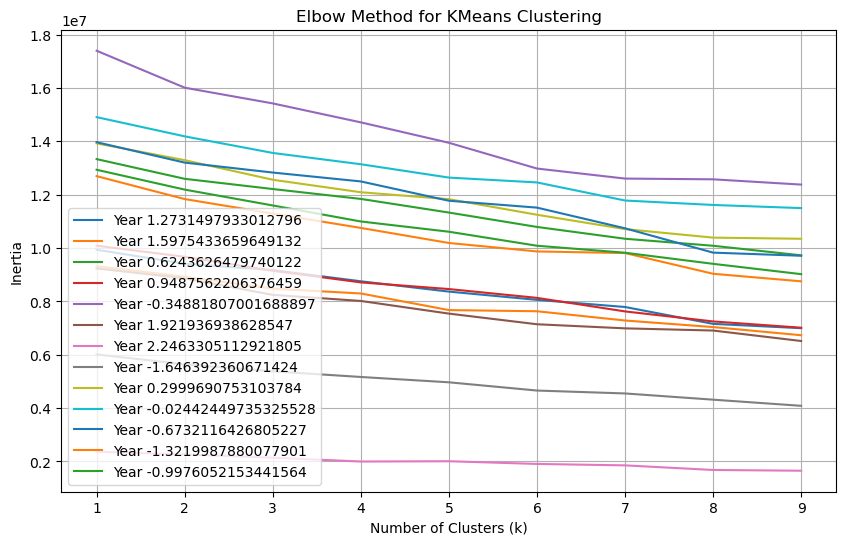

In [10]:
import matplotlib.pyplot as plt

# Initialize an empty list to store the inertias
inertias = []

# Initialize a list to store the years
years = []

# Iterate over the dictionary containing scores
for yr, score_list in scores.items():
    # Extract the inertias for the current year
    yr_inertias = [sum(score) for score in score_list]
    inertias.append(yr_inertias)
    years.append(yr)

# Plot the elbow method
plt.figure(figsize=(10, 6))
for i, yr_inertia in enumerate(inertias):
    plt.plot(range(1, 10), yr_inertia, label=f'Year {years[i]}')

plt.title('Elbow Method for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)
plt.show()


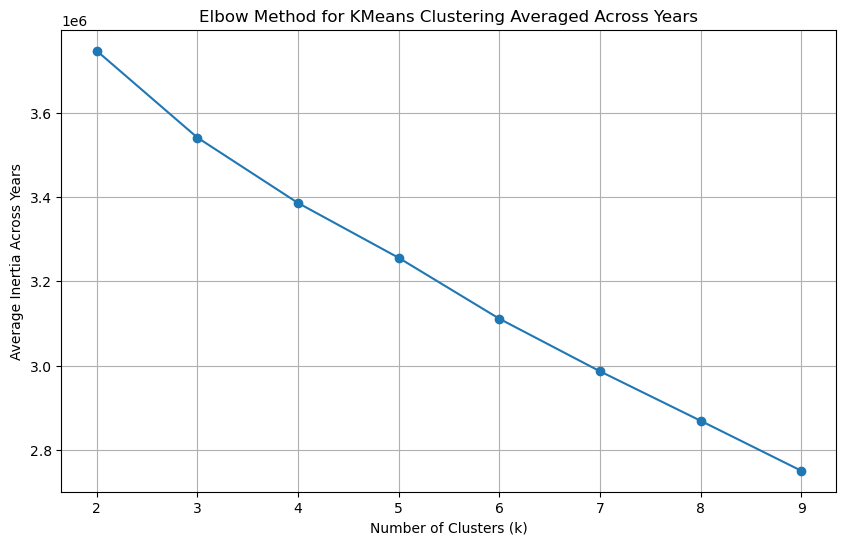

In [11]:
average_inertias_per_k = []

k_range = range(2, 10)

for k_index in k_range:
    all_inertias_for_k = []
    
    for year_inertias in scores.values():
        all_inertias_for_k.extend(year_inertias[k_index - 2])
    
    average_inertia = sum(all_inertias_for_k) / len(all_inertias_for_k)
    average_inertias_per_k.append(average_inertia)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, average_inertias_per_k, marker='o')

# Add titles and labels
plt.title('Elbow Method for KMeans Clustering Averaged Across Years')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Inertia Across Years')

# Show the plot
plt.grid(True)
plt.show()


In [12]:
data_clustering.shape

(1971716, 26)

In [13]:
kmeans = MiniBatchKMeans(
    n_clusters=5,
    max_iter=100,
    n_init=1,
    random_state=42,
    batch_size=10240
    )
kmeans.fit(data_clustering)
y_kmeans = kmeans.predict(data_clustering)

In [14]:
y_kmeans.shape, data_encoded.shape

((1971716,), (1971716, 26))

In [15]:
data_encoded['CLUSTER'] = y_kmeans
data_encoded['CLUSTER_5'] = y_kmeans

In [16]:
kmeans = MiniBatchKMeans(
    n_clusters=2,
    max_iter=100,
    n_init=1,
    random_state=42,
    batch_size=10240
    )
kmeans.fit(data_clustering)
y_kmeans2 = kmeans.predict(data_clustering)

In [17]:
data_encoded['CLUSTER_2'] = y_kmeans2

In [18]:
data['CLUSTER_2'] = data_encoded['CLUSTER_2']
data['CLUSTER_5'] = data_encoded['CLUSTER_5']

In [19]:
# Write cluster data to csv for observable
# data.to_csv("cluster_data.csv", index=False)

In [20]:
# cluster_data = data.drop(columns=['LOCATION', 'CRASH DATE', 'CRASH TIME', 'ON STREET NAME', 'OFF STREET NAME', 'CROSS STREET NAME'])
# cluster_data.columns = cluster_data.columns.str.replace(' ', '_')
# print(cluster_data.columns)
# for year in cluster_data['YEAR'].unique():
#     print(year)
#     cluster_data[cluster_data['YEAR']==year].to_csv("Cluster Data/cluster_data_"+str(year)+".csv", index=False)

In [25]:
data_encoded.drop(columns=['CLUSTER_2', 'CLUSTER_5'], inplace=True)
data_encoded.columns

Index(['BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'YEAR', 'MONTH', 'DATE', 'HOUR', 'CLUSTER'],
      dtype='object')

In [26]:
cutoff = 2023
X_train = data_encoded[data_encoded['YEAR']<cutoff].drop(columns=['CLUSTER'])
X_test = data_encoded[data_encoded['YEAR']>=cutoff].drop(columns=['CLUSTER'])
y_train = data_encoded[data_encoded['YEAR']<cutoff]['CLUSTER']
y_test = data_encoded[data_encoded['YEAR']>=cutoff]['CLUSTER']

In [27]:
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [28]:
X_test.shape

(116203, 26)

In [29]:
params = {
    "eta": 0.01,
    "objective": "multi:softprob",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "auc",
    "num_class": 5
}
model = xgboost.train(
    params,
    d_train,
    5000,
    evals=[(d_test, "test")],
    verbose_eval=100,
    early_stopping_rounds=20,
)

[0]	test-auc:0.99372
[100]	test-auc:0.99715
[200]	test-auc:0.99779
[300]	test-auc:0.99842
[400]	test-auc:0.99881
[500]	test-auc:0.99911
[600]	test-auc:0.99931
[700]	test-auc:0.99944
[800]	test-auc:0.99954
[900]	test-auc:0.99961
[1000]	test-auc:0.99967
[1100]	test-auc:0.99971
[1200]	test-auc:0.99974
[1300]	test-auc:0.99976
[1400]	test-auc:0.99978
[1500]	test-auc:0.99980
[1600]	test-auc:0.99981
[1700]	test-auc:0.99982
[1800]	test-auc:0.99984
[1900]	test-auc:0.99984
[2000]	test-auc:0.99985
[2100]	test-auc:0.99986
[2200]	test-auc:0.99986
[2300]	test-auc:0.99987
[2400]	test-auc:0.99987
[2500]	test-auc:0.99988
[2600]	test-auc:0.99988
[2700]	test-auc:0.99989
[2800]	test-auc:0.99989
[2900]	test-auc:0.99989
[3000]	test-auc:0.99990
[3100]	test-auc:0.99990
[3200]	test-auc:0.99990
[3300]	test-auc:0.99990
[3400]	test-auc:0.99990
[3500]	test-auc:0.99991
[3600]	test-auc:0.99991
[3700]	test-auc:0.99991
[3800]	test-auc:0.99991
[3900]	test-auc:0.99991
[4000]	test-auc:0.99991
[4100]	test-auc:0.99991
[420

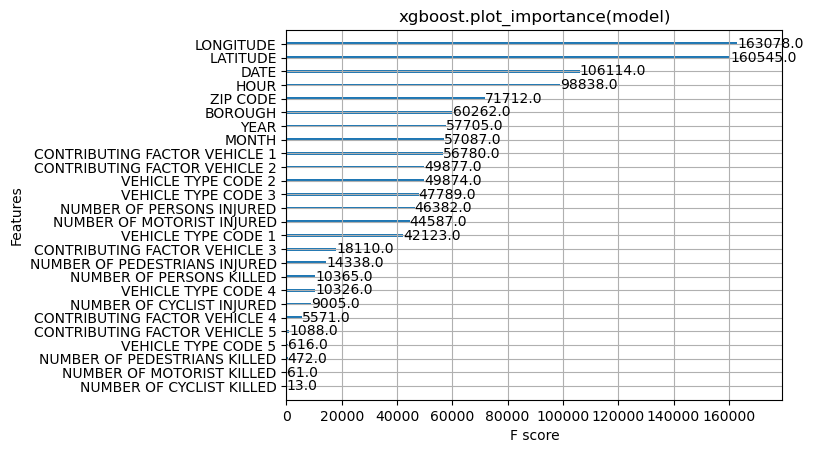

In [30]:
xgboost.plot_importance(model)
plt.title("xgboost.plot_importance(model)")
plt.show()

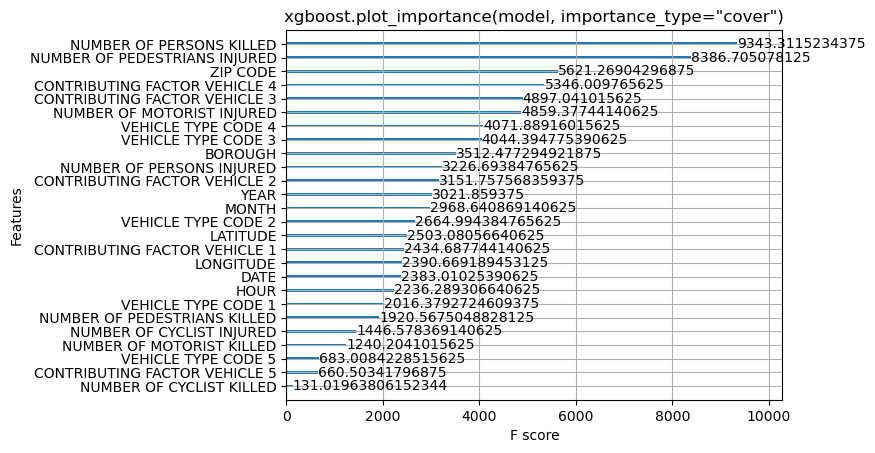

In [31]:
xgboost.plot_importance(model, importance_type="cover")
plt.title('xgboost.plot_importance(model, importance_type="cover")')
plt.show()

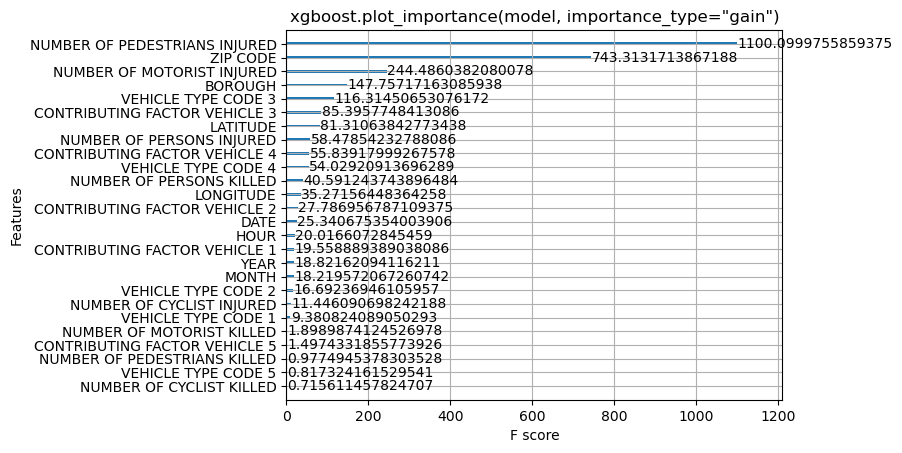

In [32]:
xgboost.plot_importance(model, importance_type="gain")
plt.title('xgboost.plot_importance(model, importance_type="gain")')
plt.show()


In [33]:
explainer = shap.TreeExplainer(model)

In [35]:
data_sample = data_encoded.sample(n=30000)
d_sample = xgboost.DMatrix(data_sample.drop(columns=['CLUSTER']), label=data_sample['CLUSTER'])

In [36]:
shap_values=explainer.shap_values(d_sample)

In [37]:
feature_names = np.array(data_sample.drop(columns=['CLUSTER']).columns)

In [38]:
shap.force_plot(
    explainer.expected_value[0], shap_values[:1000, :, 0], data_sample.drop(columns=['CLUSTER']).iloc[:1000]
)

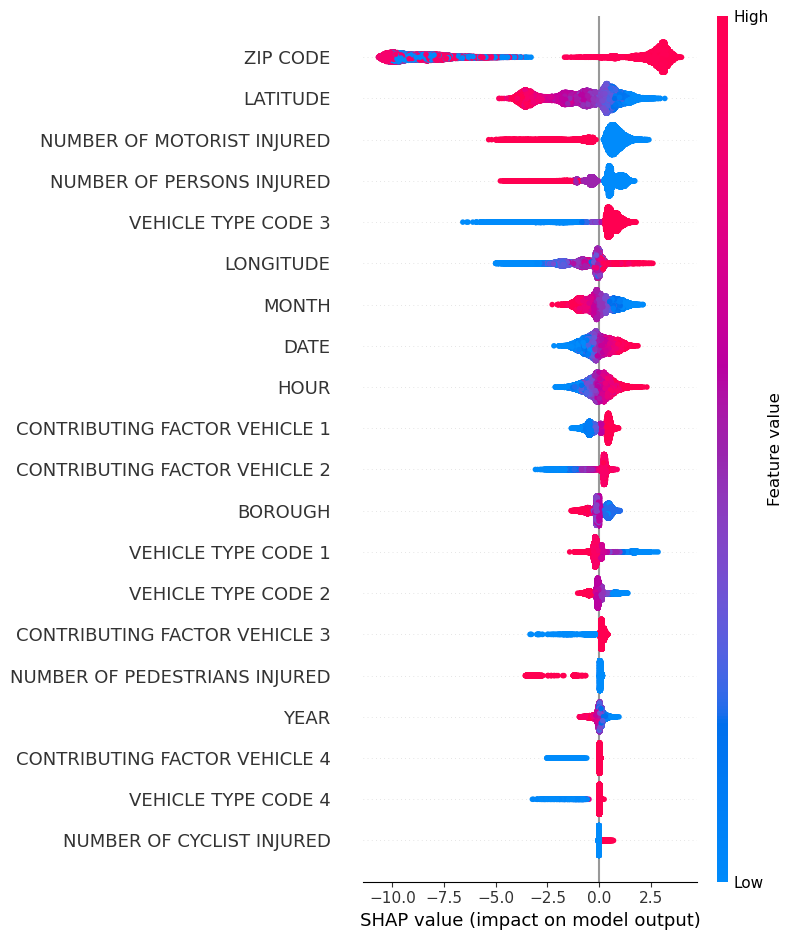

In [39]:
shap.summary_plot(shap_values[:,:,0], data_sample.drop(columns=['CLUSTER']))

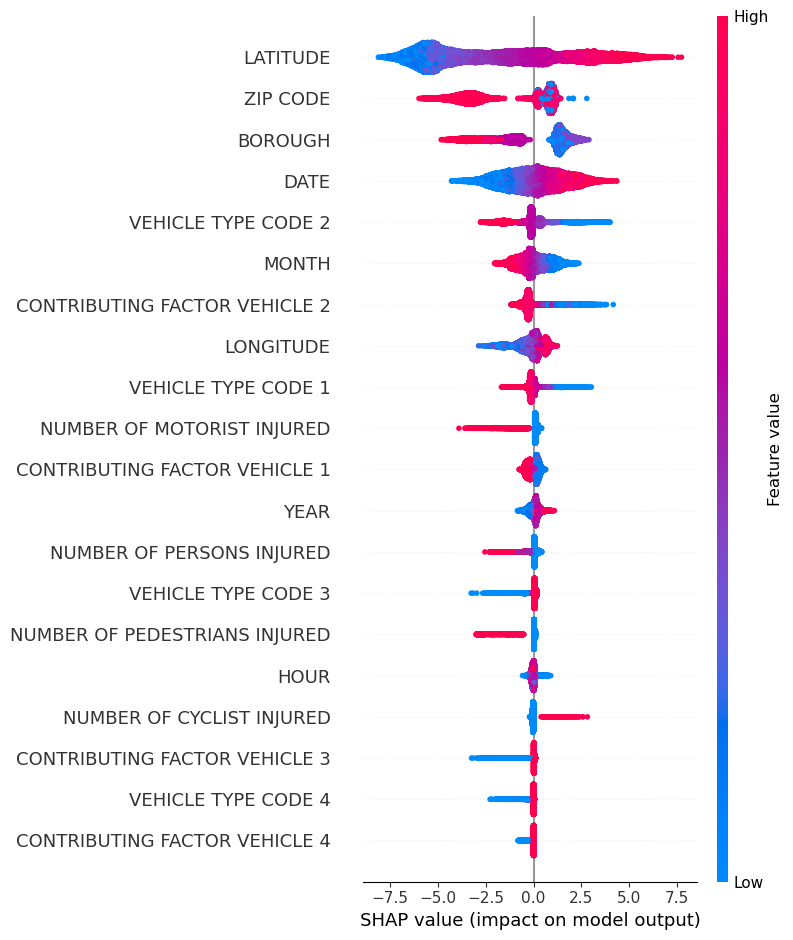

In [40]:
shap.summary_plot(shap_values[:,:,1], data_sample.drop(columns=['CLUSTER']))

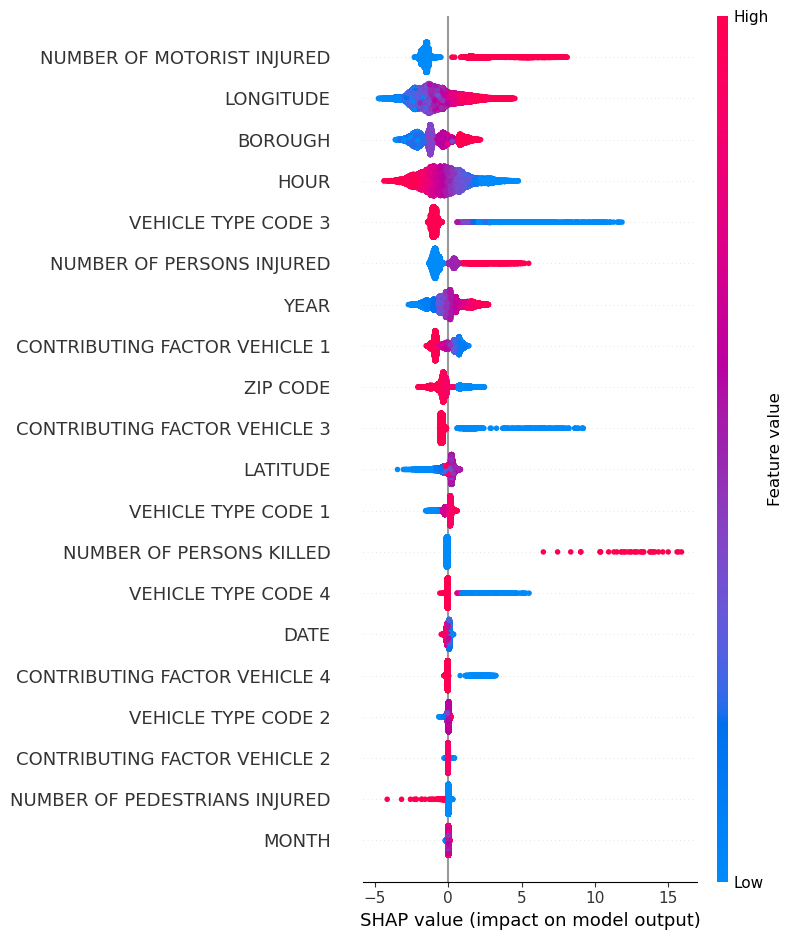

In [41]:
shap.summary_plot(shap_values[:,:,2], data_sample.drop(columns=['CLUSTER']))

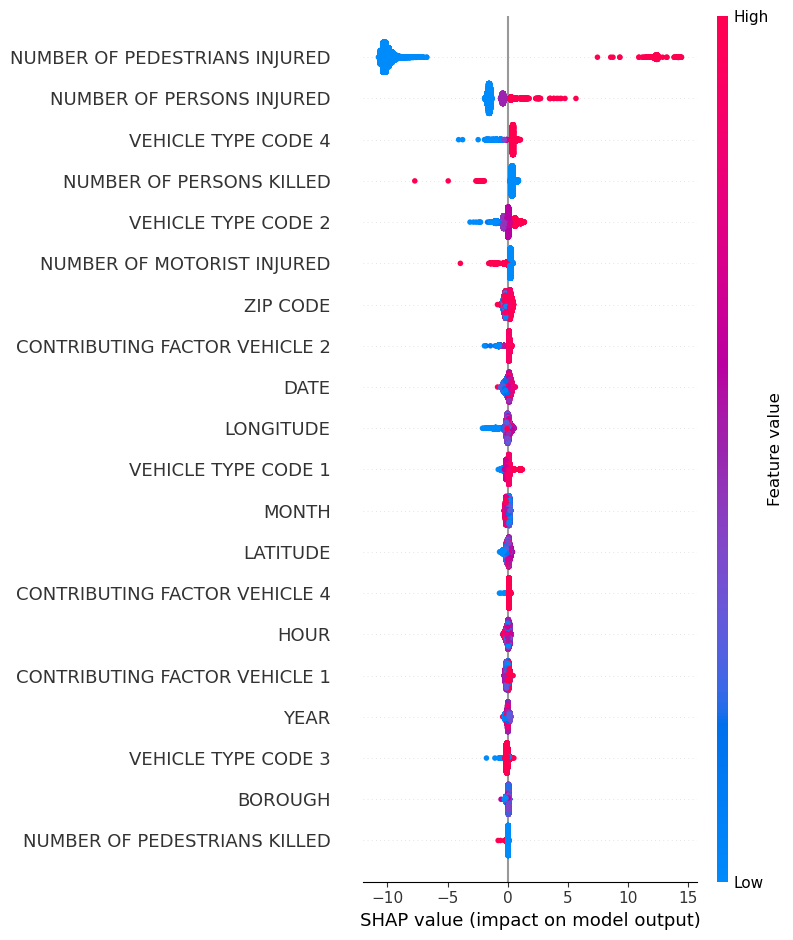

In [42]:
shap.summary_plot(shap_values[:,:,3], data_sample.drop(columns=['CLUSTER']))

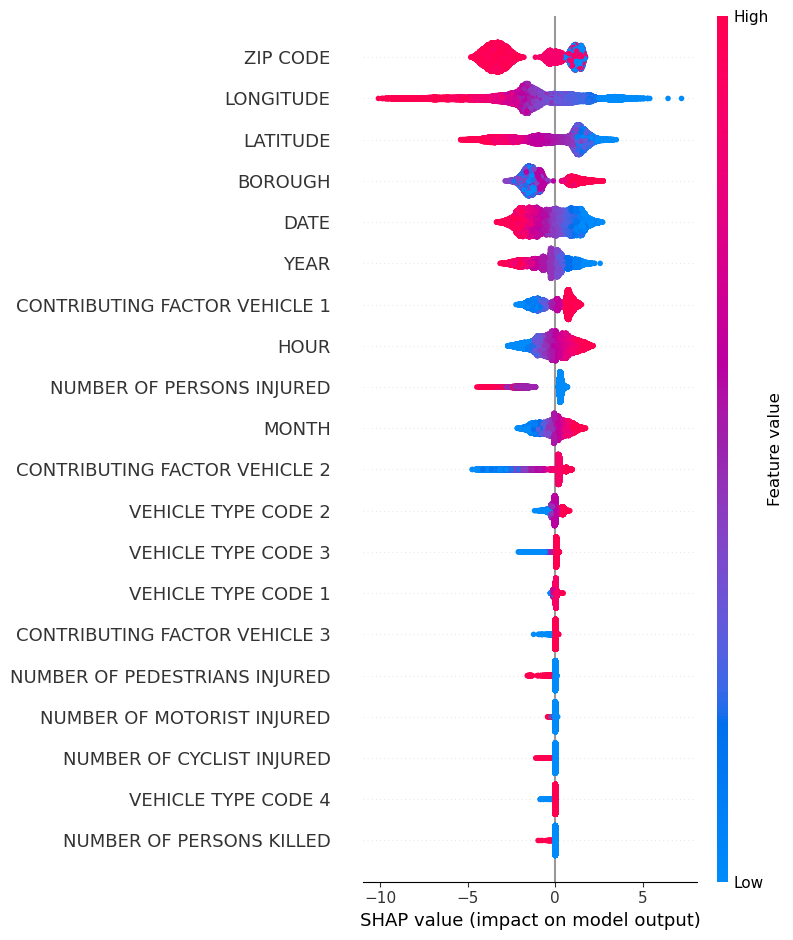

In [43]:
shap.summary_plot(shap_values[:,:,4], data_sample.drop(columns=['CLUSTER']))

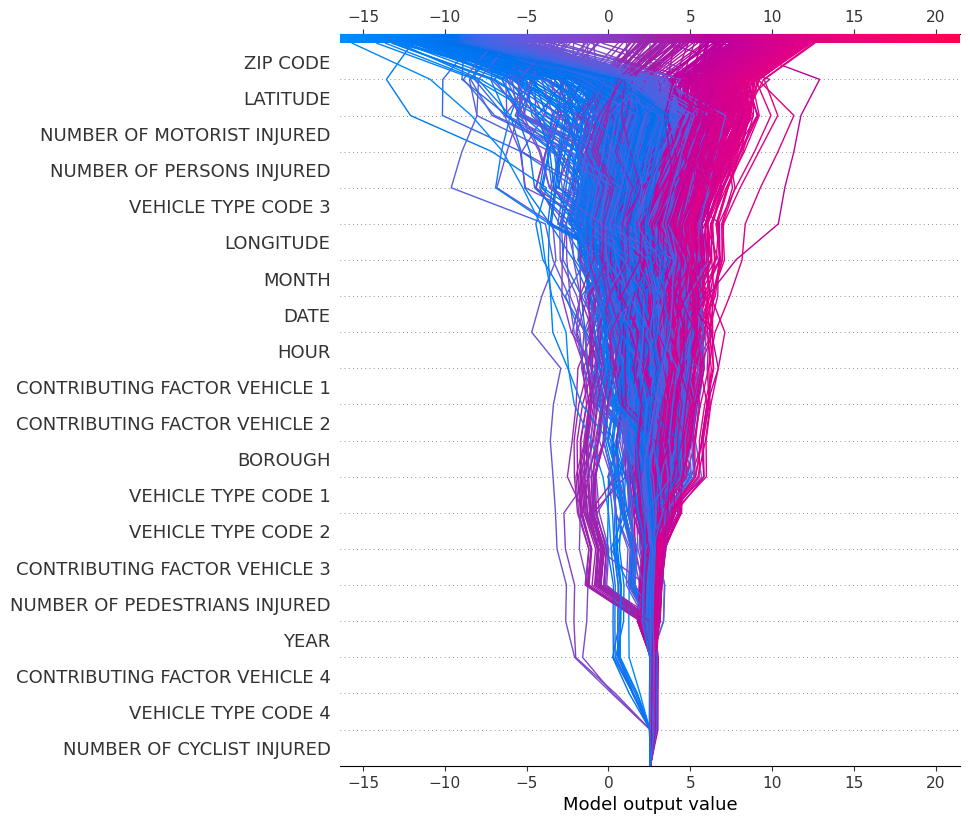

In [44]:
shap.decision_plot(explainer.expected_value[0], shap_values[:1000,:,0], feature_names=feature_names)

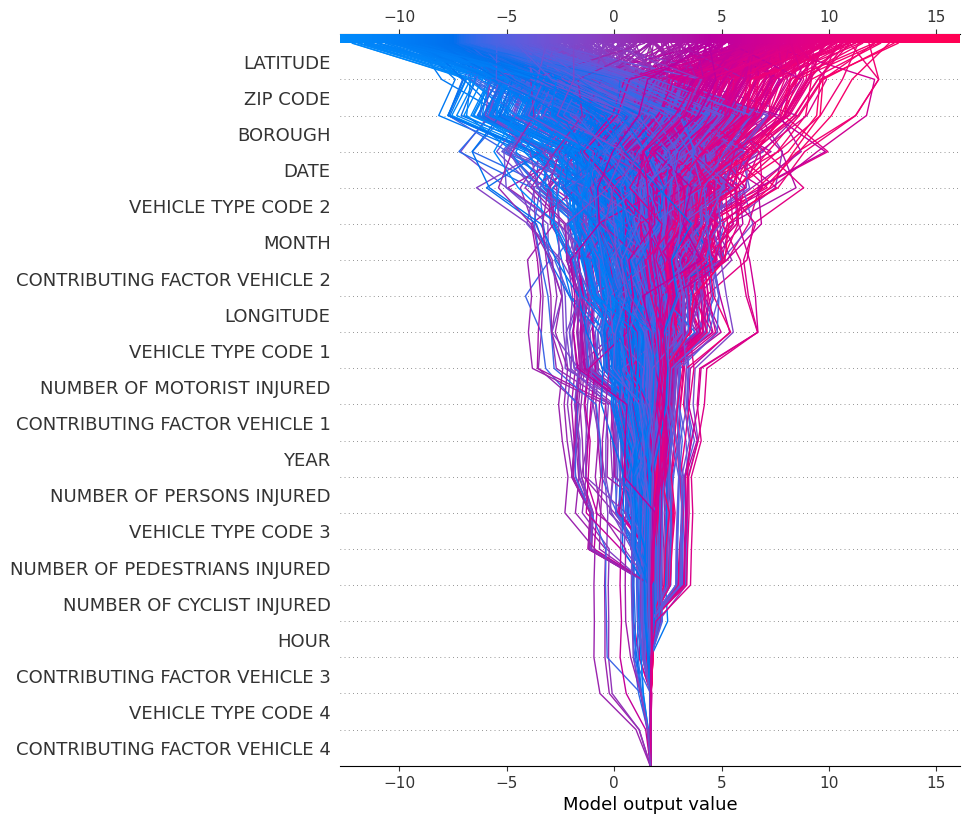

In [45]:
shap.decision_plot(explainer.expected_value[1], shap_values[:1000,:,1], feature_names=feature_names)

In [46]:
feature_names = np.array(data_sample.drop(columns=['CLUSTER']).columns)

In [47]:
shap.force_plot(
    explainer.expected_value[0], shap_values[:1000, :, 0], data_sample.drop(columns=['CLUSTER']).iloc[:1000]
)